# Librería

In [1]:

import sympy as sp
import numpy as np
import pandas as pd
import pint
u = pint.UnitRegistry()
Q= u.Quantity
import scipy.constants as cnst
from scipy import optimize
import scipy

from matplotlib import pyplot as plt 
from sympy.interactive import printing
sp.init_printing(use_latex=True) # doctest: +SKIP

from IPython.display import HTML
#from iapws import IAPWS97

from libreria.Funciones import *

ModuleNotFoundError: No module named 'libreria'

# Selectividad

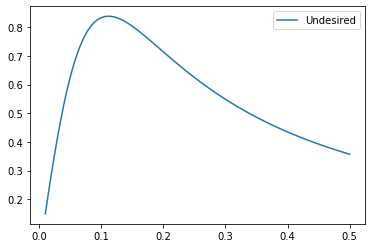

Optimization terminated successfully.
         Current function value: -0.838525
         Iterations: 19
         Function evaluations: 38


(array([0.1118125]), -0.8385254887844285, 19, 38, 0)

In [2]:
T= np.linspace(300,650,500)
Ca= np.linspace(0.01,0.5,100)


def Arrhenius(Ao,Ea,alpha):
    return lambda Te: Ao*np.exp(Ea*(1/300-1/Te))*C**alpha

def r(k,alpha):
    return lambda C: k*C**alpha

def func_caracteristica(Ca):
    return rq(Ca)/(rus(Ca)+rd(Ca))

rd = Arrhenius(0.0001,10000,0)
rq = Arrhenius(0.0015,15000,1)
ru = Arrhenius(0.008,20000,2)

rd = r(0.0001,0)
rq = r(0.0015,1)
ru =  r(0.008,2)


rds= np.vectorize(rd)
rqs= np.vectorize(rq)
rus= np.vectorize(ru)




#plt.plot(Ca,np.log(rds(Ca)),label="Undesired")
#plt.plot(Ca,np.log(rqs(Ca)),label="Desired")
#plt.plot(Ca,np.log(rus(Ca)),label="Undesired")
plt.plot(Ca,rq(Ca)/(rus(Ca)+rd(Ca)),label="Undesired")

plt.legend()
plt.show()


sol=scipy.optimize.fmin(lambda x: -func_caracteristica(x), 0,full_output=1)
sol
